# **Hypothesis**
Students who have more than 6 months prior experience in computer programming are more likely to rate the course difficulty as less than or equal to 3, on a scale where 1 represents easy and 7 represents hard.

In [25]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled.")

Autoreload of imported modules enabled.


**The first step is to import the csv of student survey data and convert it into a column-oriented table.**

In [26]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## To Begin the Investigation
* The two categories I am interested in for this question are "prior experience" and "difficulty rating".
* I convert the difficulty ratings from strings to int objects in order to easily categorize the ratings as "difficult" or "easy", with a new function called `difficulty`.


In [27]:
from data_utils import column_values, difficulty
values: list[str] = column_values(data_rows, "difficulty")

qual_ratings: list[str] = difficulty(values)

* Also I wanted to categorize responses for prior experience into either "more" or "little" experience.
* I have written a new function, `sort_experience` to qualitatively categorize the list of difficulty ratings and the list of prior experience.

In [28]:
from data_utils import column_values, sort_experience, head
all_expers: list[str] = column_values(data_rows, "prior_exp")
exp_ratings: list[str] = sort_experience(all_expers)


## Table of Relevant Data
In this step, I created a table limited to contain just the columns for row number, prior experience, and ratings. First I limited the table to the chosen headings, added the categorized data that I had sorted each list into, then used tabulate to make a table.

In [29]:
from data_utils import select, head
to_show: list[str] = ["row_number", "prior_exp", "difficulty"]
evidence: dict[str, list[str]] = select(columns, to_show)

evidence["Relative Experience"] = exp_ratings
evidence["Qualitative Rating"] = qual_ratings
sample_evid: dict[str, list[str]] = head(evidence, 20)
sample_evid

{'row_number': ['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121'

Here I implement the `tabulate` function from ex07 and create a table showing the first 20 responses from the survey.

In [30]:
from tabulate import tabulate

hypothesis: dict[str, list[str, str]] = sample_evid

tabulate(hypothesis, hypothesis.keys(), "html")

row_number,prior_exp,difficulty,Relative Experience,Qualitative Rating
0,None to less than one month!,5,little,difficult
1,None to less than one month!,3,little,easy
2,None to less than one month!,5,little,difficult
3,None to less than one month!,6,little,difficult
4,None to less than one month!,4,little,difficult
5,Over 2 years,5,more,difficult
6,None to less than one month!,6,little,difficult
7,None to less than one month!,5,little,difficult
8,None to less than one month!,5,little,difficult
9,None to less than one month!,7,little,difficult


## Create a Bar Graph.
In this step, I try a simple bar graph of the ratings students gave the course if they have more than 6 months of experience in compter languages.
* I use a new function, `bar_graph`, to record the number of ratings only for responses with higher experience.
* I predict a normal distribution of responses in the data towards the lower difficulty ratings.
Result: 1:7, 2:17, 3:15, 4:18, 5:10, 6:2, 7:4,  67 responses

In [31]:
from data_utils import count, bar_graph
easy_bar: dict[str, int] = count(exp_ratings)
# little = 508, more = 67
for_bar: list[str] = bar_graph(values, exp_ratings)
count(for_bar)
# 1:7, 2:17, 3:15, 4:18, 5:10, 6:2, 7:4,  67 responses
# Plug in data: 7,17,15,18,10,2,4

{'5': 10, '2': 17, '4': 18, '1': 7, '3': 15, '7': 4, '6': 2}

Here is the set up for a bar graph from ex07. Now it shows the number of experienced students that responded with each rating.

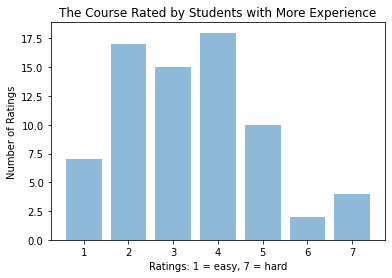

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]  # the order the labels will be arranged in bar chart
performance = [7,17,15,18,10,2,4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Ratings')
plt.xlabel('Ratings: 1 = easy, 7 = hard')
plt.title('The Course Rated by Students with More Experience')

plt.show()

# **The Conclusion**

I expected that students who rated this course as less difficult would most likely have previous experience. I chose 6 months as the cutoff because I wanted the included responders to have taken at least 1 class in computer programming and I assume those classes would have lasted 3 - 6 months, depending on if it was from college or high school. 
I filtered the responses from the survey to find that 67 students in total had more than 6 months experience but out of those 67, 39 rated the course difficulty as less than 4. These are not the results I expected because the number of people who rated the course as easy is closer to just half of the whole sample. According to the bar graph, the most popular rating was 4, right in the middle, and 3 was the most popular response in the interval that I predicted most of the responses would land in, which I didn't expect. I was also surprised that some of the ratings are at 7, for difficult because of the experience. To create a more accurate analysis, I would have made a scatter plot with ratings on the x-axis and the categorical options of experience on the y-axis. I would hope to see a negative trend between previous experience and the rating value. My bar graph shows the distribution of ratings but more conclusive analysis would have to be done with a scatter plot in order to hypothesize correlation between the two categories. 